Saving upi_transactions (1).csv to upi_transactions (1).csv


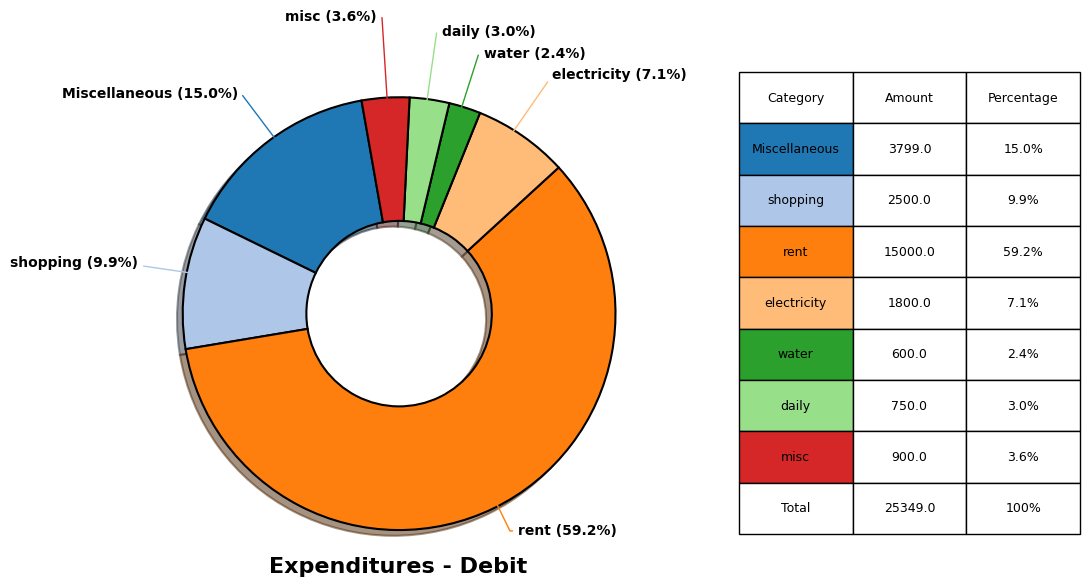

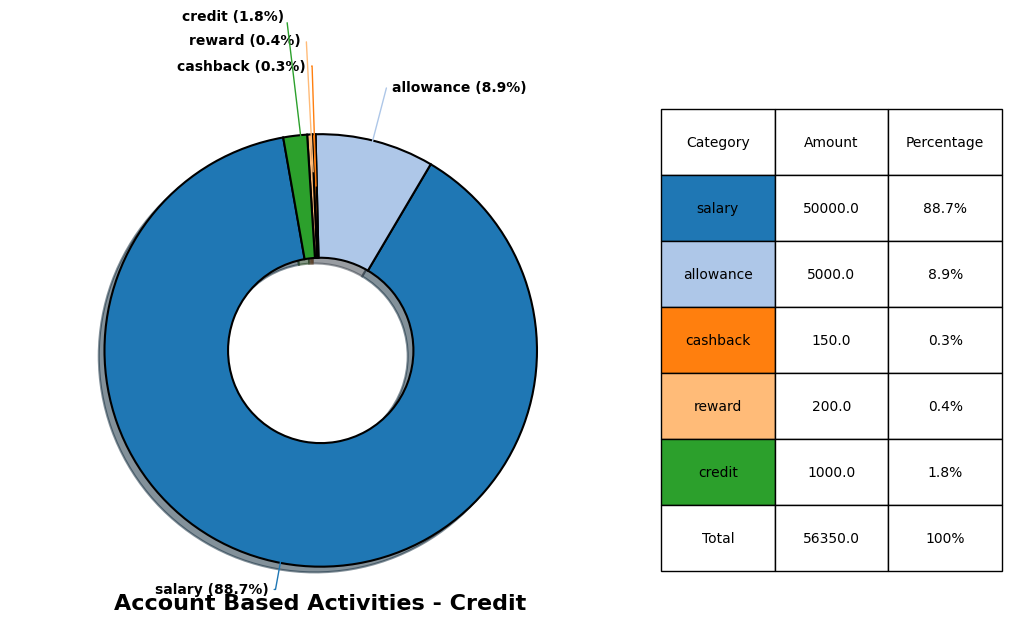

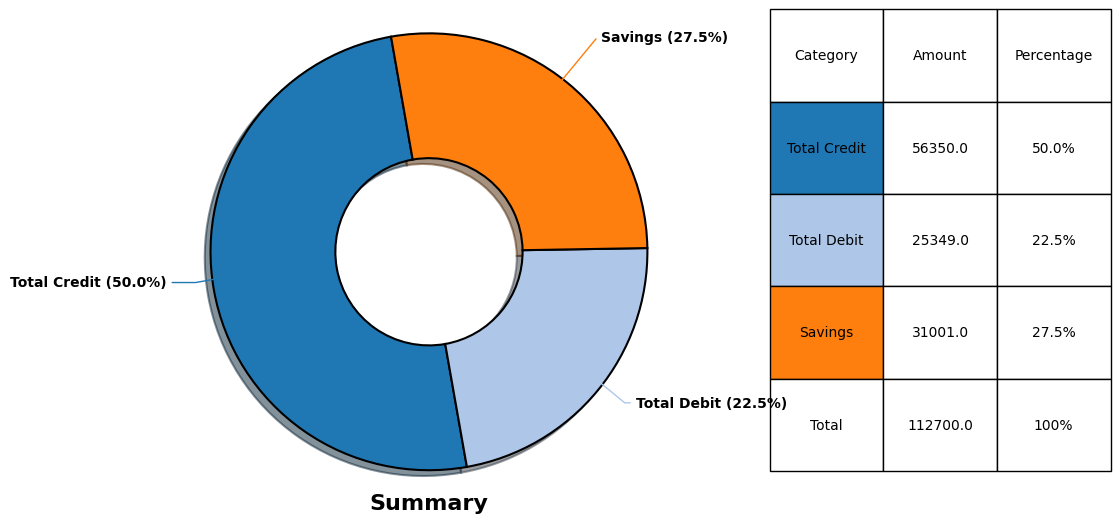

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import numpy as np

# Base Class Transactions to show encapsulation and abstraction

class Transaction:
    def __init__(self, date, description, amount):
        # Encapsulation: storing transaction details
        self.date = date
        self.description = description
        self.amount = amount
        self.type_ = None  # Abstract attribute to be defined in subclasses


# Subclasses to demonstrate inheritance and polymorphism

class DebitTransaction(Transaction):
    def __init__(self, date, description, amount):
        super().__init__(date, description, amount)
        self.type_ = "Debit"

class CreditTransaction(Transaction):
    def __init__(self, date, description, amount):
        super().__init__(date, description, amount)
        self.type_ = "Credit"


# Finance Analyzer Class shows abstraction and encapsulation)

class FinanceAnalyzer:
    def __init__(self):
        self.transactions = []  # Encapsulated list

    # Polymorphism: same method works for any subclass of ythe bese class-Transaction
    def add_transaction(self, t: Transaction):
        self.transactions.append(t)

    # Abstraction: internal calculations are hidden from user
    def plot_analysis(self):
        debit_kw = ["food","shopping","rent","phone","electricity","water","groceries","daily","misc"]
        credit_kw = ["salary","allowance","cashback","reward","credit"]

        debit_cat, credit_cat = {}, {}
        total_debit = total_credit = 0

        # Categorize transactions
        for t in self.transactions:
            desc = t.description.lower()
            if t.type_ == "Debit":
                cat = next((k for k in debit_kw if k in desc), "Miscellaneous")
                debit_cat[cat] = debit_cat.get(cat,0) + t.amount
                total_debit += t.amount
            else:
                cat = next((k for k in credit_kw if k in desc), "Misc Credits")
                credit_cat[cat] = credit_cat.get(cat,0) + t.amount
                total_credit += t.amount

        savings = total_credit - total_debit
        charts = [("Expenditures - Debit", debit_cat),
                  ("Account Based Activities - Credit", credit_cat),
                  ("Summary", {"Total Credit": total_credit, "Total Debit": total_debit, "Savings": savings})]

        # Pie charts for viz
        for title, data in charts:
            colors = sns.color_palette("tab20", len(data)) if len(data)<=20 else sns.color_palette("hls", len(data))
            fig, ax = plt.subplots(figsize=(8,6))
            total = sum(data.values())
            wedges,_ = ax.pie(data.values(), labels=None, startangle=100,
                              colors=colors, wedgeprops={"edgecolor":"black","linewidth":1.5,"width":0.6},
                              shadow=True, explode=[0.02]*len(data))

            y_positions = []
            for i,w in enumerate(wedges):
                ang = (w.theta2 + w.theta1)/2
                x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))

                # beuatifying labels
                offset = 0
                while any(abs(y+offset-yp)<0.05 for yp in y_positions):
                    offset += 0.05 if y>=0 else -0.05
                y += offset
                y_positions.append(y)

                label_text = f"{list(data.keys())[i]} ({data[list(data.keys())[i]]/total*100:.1f}%)"
                extra_space = 0.03 * max(len(label_text)//15,1)
                label_x = x*1.25 + (extra_space if x>0 else -extra_space)

                ax.annotate(label_text,
                            xy=(x*0.7, y*0.7), xytext=(label_x, y*1.25),
                            arrowprops=dict(arrowstyle="-", connectionstyle=f"angle,angleA=0,angleB={ang}", color=colors[i]),
                            horizontalalignment='left' if x>0 else 'right', fontsize=10, fontweight='bold', color='black')

                w.set_center((0,-0.05))
                w.set_radius(1.05)

            ax.set_title(title, fontsize=16, fontweight='bold', y=-0.1)
            ax.axis('equal')

            table_data = [[k, v, f"{v/total*100:.1f}%"] for k,v in data.items()]
            table_colors = [[colors[i], "white", "white"] for i in range(len(data))]
            table_data.append(["Total", total, "100%"])
            table_colors.append(["white","white","white"])

            ax.table(cellText=table_data, cellColours=table_colors,
                     colLabels=["Category","Amount","Percentage"], cellLoc="center", colLoc="center",
                     loc="right", bbox=[1.05,0,0.55,1], edges='closed')
            plt.show()

# upload upi file

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

analyzer = FinanceAnalyzer()

# Polymorphism: works with any Transaction subclass
for _, r in df.iterrows():
    t = DebitTransaction(r["Date"], r["Description"], float(r["Amount"])) if str(r["Type"]).strip().lower()=="debit" \
        else CreditTransaction(r["Date"], r["Description"], float(r["Amount"]))
    analyzer.add_transaction(t)

# Abstraction: simple call hides all internal plotting and calculations
analyzer.plot_analysis()
